## Descriptive Grahps of the Method for the Thesis

In [55]:
## Import necessary packages
import torch
import torch.nn as nn
import torch.optim as optim

import log_hyperu as hyperu
import numpy as np
import matplotlib.pyplot as plt

## Create x-axis space
num_points_outside = 100
num_points_aroundzero = 200

x_outside_neg = np.linspace(-10, -0.01, num_points_outside, endpoint=False)
x_aroundzero = np.linspace(-0.01, 0.01, num_points_aroundzero, endpoint=False)
x_outside_pos = np.linspace(0.01, 10, num_points_outside, endpoint=False)

x_values = np.concatenate((x_outside_neg, x_aroundzero, x_outside_pos))

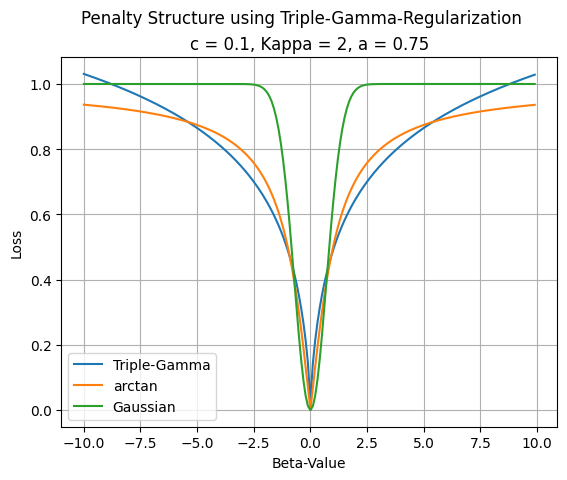

In [60]:
### Structure of the Penalty for different values in a
# Set the some values for a (Given that a>0.5) and the remaining parameters
a_values = [0.75]
c = 0.1
kappa = 2
lamda = 0.2
y_values_LASSO = list()
y_values_RIDGE = list()
y_values_arctan = list()
y_values_Gaussian = list()

# Plot the function log(-U(.,.,.)) for each value of a
for a in a_values:
    y_values = list()
    for x in x_values:
        phi = (2*c)/((kappa**2)*a)
        y_value = lamda*((-1)*hyperu.log_hyperu(torch.tensor([[c+0.5]]),torch.tensor([[1.5-a]]),(torch.tensor([[x]])**2)/(2*phi))+hyperu.log_hyperu(torch.tensor([[c+0.5]]),torch.tensor([[1.5-a]]),torch.tensor([[0.0]])))
        y_values.append(y_value.item())
        y_values_LASSO.append(x**2)
        y_values_RIDGE.append(abs(x))
        y_values_Gaussian.append((1-np.e**(-x**2)))
        y_values_arctan.append((2/np.pi)*np.arctan(abs(x)))
    plt.plot(x_values, y_values, label="Triple-Gamma")
    #plt.plot(x_values, y_values_LASSO, label="LASSO")
    #plt.plot(x_values, y_values_RIDGE, label="Ridge")
    plt.plot(x_values, y_values_arctan, label="arctan")
    plt.plot(x_values, y_values_Gaussian, label="Gaussian")



# Add labels and title
plt.xlabel('Beta-Value')
plt.ylabel('Loss')
plt.suptitle('Penalty Structure using Triple-Gamma-Regularization')
plt.title('c = 0.1, Kappa = 2, a = 0.75')
plt.legend()
plt.grid(True)
plt.savefig("021_simulation_figures/simpleTGpenalty.png")
plt.show()

#### Variations in the Input Parameters
##### Changes in _a_

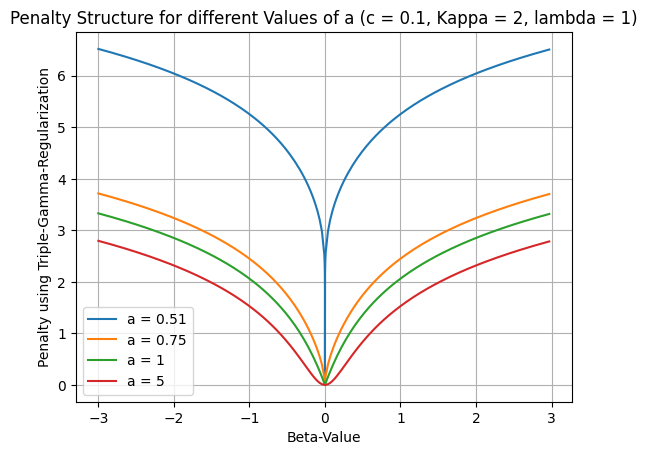

In [44]:
### Structure of the Penalty for different values in a
# Set the some values for a (Given that a>0.5) and the remaining parameters
a_values = [0.51,0.75,1,5]
c = 0.1
kappa = 2
lamda = 1

# Plot the function log(-U(.,.,.)) for each value of a
for a in a_values:
    y_values = list()
    for x in x_values:
        phi = (2*c)/((kappa**2)*a)
        y_value = lamda*(-1)*hyperu.log_hyperu(torch.tensor([[c+0.5]]),torch.tensor([[1.5-a]]),(torch.tensor([[x]])**2)/(2*phi))+hyperu.log_hyperu(torch.tensor([[c+0.5]]),torch.tensor([[1.5-a]]),torch.tensor([[0.0]]))
        y_values.append(y_value.item())
    plt.plot(x_values, y_values, label=f'a = {a}')

# Add labels and title
plt.xlabel('Beta-Value')
plt.ylabel('Penalty using Triple-Gamma-Regularization')
plt.title('Penalty Structure for different Values of a (c = 0.1, Kappa = 2, lambda = 1)')
plt.legend()
plt.grid(True)
plt.savefig("021_simulation_figures/TGPenalty_ChangeInA.png")
plt.show()

##### Changes in _c_

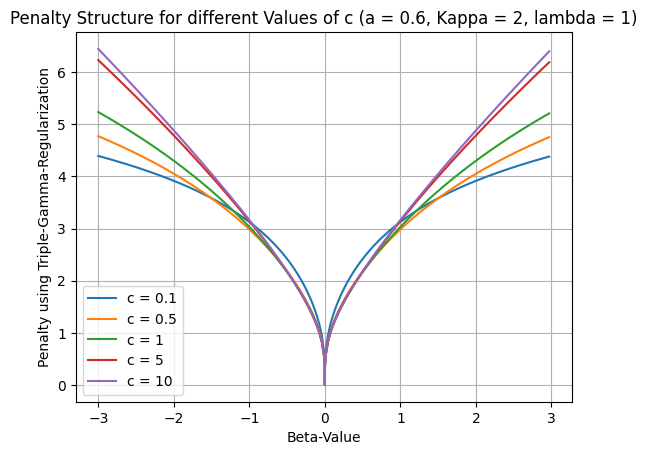

In [46]:
### Structure of the Penalty for different values in c
# Set the some values for c (Given that c > 0) and the remaining parameters
c_values = [0.1,0.5,1,5,10]
a = 0.6
kappa = 2
lamda = 1

# Plot the function log(-U(.,.,.)) for each value of c
for c in c_values:
    y_values = list()
    for x in x_values:
        phi = (2*c)/((kappa**2)*a)
        y_value = lamda*(-1)*hyperu.log_hyperu(torch.tensor([[c+0.5]]),torch.tensor([[1.5-a]]),(torch.tensor([[x]])**2)/(2*phi))+hyperu.log_hyperu(torch.tensor([[c+0.5]]),torch.tensor([[1.5-a]]),torch.tensor([[0.0]]))
        y_values.append(y_value.item())
    plt.plot(x_values, y_values, label=f'c = {c}')

# Add labels and title
plt.xlabel('Beta-Value')
plt.ylabel('Penalty using Triple-Gamma-Regularization')
plt.title('Penalty Structure for different Values of c (a = 0.6, Kappa = 2, lambda = 1)')
plt.legend()
plt.grid(True)
plt.savefig("021_simulation_figures/TGPenalty_ChangeInC.png")
plt.show()

##### Changes in Kappa

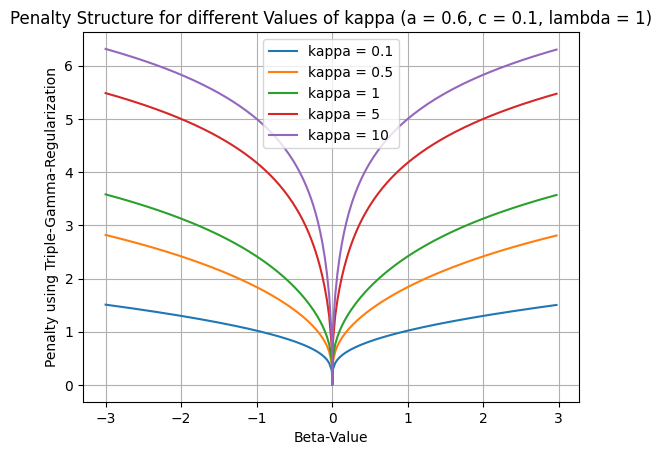

In [48]:
### Structure of the Penalty for different values in kappa
# Set the some values for kappa (Given that kappa > 0) and the remaining parameters
kappa_values = [0.1,0.5,1,5,10]
a = 0.6
c = 0.1
lamda = 1

# Plot the function log(-U(.,.,.)) for each value of kappa
for kappa in kappa_values:
    y_values = list()
    for x in x_values:
        phi = (2*c)/((kappa**2)*a)
        y_value = lamda*(-1)*hyperu.log_hyperu(torch.tensor([[c+0.5]]),torch.tensor([[1.5-a]]),(torch.tensor([[x]])**2)/(2*phi))+hyperu.log_hyperu(torch.tensor([[c+0.5]]),torch.tensor([[1.5-a]]),torch.tensor([[0.0]]))
        y_values.append(y_value.item())
    plt.plot(x_values, y_values, label=f'kappa = {kappa}')

# Add labels and title
plt.xlabel('Beta-Value')
plt.ylabel('Penalty using Triple-Gamma-Regularization')
plt.title('Penalty Structure for different Values of kappa (a = 0.6, c = 0.1, lambda = 1)')
plt.legend()
plt.grid(True)
plt.savefig("021_simulation_figures/TGPenalty_ChangeInKappa.png")
plt.show()